# Transfer learning

В зависимости от количества и природы данных есть выбор из **нескольких стратегий Transfer Learning**, а именно:

* **мало данных** ($\le$ 10k) и они **похожи** на данные, на которых была обучена сеть до этого:  
  - Если данные совсем похожи, можно попробовать использовать готовую модель. Если качество не устраивает, то тогда стоит использовать CNN для извлечения признаков и обучить свой классификатор на этих данных. Так как данные похожи на те, на которых обучалась сеть, то высокоуровневые признаки, полученные с помощью последних слоёв сети, должны оказаться информативными. Если делать в этом случае Fine-Tuning, то сеть может переобучиться, поскольку данных мало.
* **мало данных** ($\le$ 10k) и они **не похожи** на данные, на которых была обучена сеть до этого:  
  - Здесь мы не можем ожидать от сети, что выходы последних слоёв будут информативными для новых данных. Следует также действовать как и в пункте выше, но брать как признаки выходы более ранних слоёв, ведь, как мы помним, они (как ожидается) соответствуют более общим паттернам в данных.
* **много данных** ($\ge$ 10k) и они **похожи** на данные, на которых была обучена сеть до этого: 
  - В этом случае можем смело делать Fine-Tuning (если не устроило качество модели "из коробки"), ведь данных много, и вероятность переобучения меньше. В данном случае имеет смысл разморозить веса последних нескольких слоёв.
* **много данных** ($\ge$ 10k) и они **не похожи** на данные, на которых была обучена сеть до этого:
  - В этом случае можно полностью менять все параметры (и гиперпараметры) нейросети, ведь по сути мы пользуемся только её архитектурой, забывая о том, что она уже была когда-то обучена. Но часто веса предобученной сети оставляют в качестве инициализации для обучения на новых данных.

Давайте соберем теперь все наши знания воедино в один удобный работающий pipeline. Теперь вы можете дать максимальный простор творчеству и проводить сколь угодно много экспериментов. 

Первым делом установим необходимые библиотеки. Среда Google Colab имеет особенность в плане совместимостей версий, поэтому порой бывает необходимо установить определенную версию того или иного пакета.

In [ ]:
!pip install -U albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 904.7 kB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [ ]:
!pip uninstall opencv-python

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cv2/*
    /usr/local/lib/python3.9/dist-packages/opencv_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libavcodec-16a334ab.so.59.37.100
    /usr/local/lib/python3.9/di

In [ ]:
!pip uninstall opencv-contrib-python

Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python-4.7.0.72.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_contrib_python.libs/libavcodec-16a334ab.so.59

In [ ]:
!pip install opencv-contrib-python==4.5.5.62

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
!pip install -q --upgrade wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 25.0 MB/s eta 0:00:00


In [ ]:
import os
import wandb
import shutil 
from pathlib import Path

import numpy as np 
import random

import cv2
from tqdm import tqdm
import copy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau, StepLR

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

import timm

import albumentations as A
import albumentations.pytorch as AP

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90, Resize, RandomCrop,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose, Rotate, RandomScale, RandomGridShuffle,
    RandomContrast, RandomGamma, RandomBrightness, CenterCrop, VerticalFlip, ColorJitter,
    ChannelShuffle, InvertImg, RGBShift, ElasticTransform, Equalize, RandomResizedCrop, ChannelDropout
)

import matplotlib.pyplot as plt
%matplotlib inline

[INFO] Couldn't find torchinfo... installing it.


In [ ]:
# ====================================================
# CFG - класс с параметрами нашего эксперимента
# ====================================================

class CFG:

    num_workers=2
    model_name='resnet' # ['resnext', 'inception', 'densenet', 'efficientnet']
    size=224
    scheduler='StepLR' # ['StepLR', 'ReduceLROnPlateau', 'CosineAnnealingLR', 'CosineAnnealingWarmRestarts']
    epochs=30
    step_size = 20 # StepLR
    gamma = 0.1 # StepLR
    #factor=0.2 # ReduceLROnPlateau
    #patience=4 # ReduceLROnPlateau
    #eps=1e-6 # ReduceLROnPlateau
    #T_max=6 # CosineAnnealingLR
    #T_0=6 # CosineAnnealingWarmRestarts
    lr=1e-4 # 3e-4
    min_lr=1e-6
    batch_size=8
    seed=42

    api = ""
    project = ""
    entity = ""
    wandb = False

In [ ]:
# Переведем наш класс с параметрами в словарь

def class2dict(f):
  return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

In [ ]:
# Зафиксируем seed для воспроизводимости

def seed_everything(seed):
    random.seed(seed) # фиксируем генератор случайных чисел
    os.environ['PYTHONHASHSEED'] = str(seed) # фиксируем заполнения хешей. PYTHONHASHSEED переменная среды с фиксированным значением
    np.random.seed(seed) # фиксируем генератор случайных чисел numpy
    torch.manual_seed(seed) # фиксируем генератор случайных чисел pytorch
    torch.cuda.manual_seed(seed) # фиксируем генератор случайных чисел для GPU

# **Задача. Классификация imagenette10**. 
Цель: Добиться 98% точности на тестовом наборе датасета imagenette10.

In [ ]:
# Загружаем датасет
dataset_path = 'imagenette2-160/'
if not os.path.exists(dataset_path):
    !wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz
    !tar zxvf imagenette2-160.tgz

Выходные данные были обрезаны до нескольких последних строк (5000).
imagenette2-160/train/n03888257/n03888257_16077.JPEG
imagenette2-160/train/n03888257/n03888257_23339.JPEG
imagenette2-160/train/n03888257/n03888257_44204.JPEG
imagenette2-160/train/n03888257/n03888257_61633.JPEG
imagenette2-160/train/n03888257/n03888257_15067.JPEG
imagenette2-160/train/n03888257/n03888257_75365.JPEG
imagenette2-160/train/n03888257/n03888257_63966.JPEG
imagenette2-160/train/n03888257/n03888257_3927.JPEG
imagenette2-160/train/n03888257/n03888257_20684.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00047778.JPEG
imagenette2-160/train/n03888257/n03888257_14016.JPEG
imagenette2-160/train/n03888257/n03888257_37776.JPEG
imagenette2-160/train/n03888257/ILSVRC2012_val_00041706.JPEG
imagenette2-160/train/n03888257/n03888257_17513.JPEG
imagenette2-160/train/n03888257/n03888257_17143.JPEG
imagenette2-160/train/n03888257/n03888257_6738.JPEG
imagenette2-160/train/n03888257/n03888257_4355.JPEG
imagenette2-160/tr

Данный датасет представляет собой набор картинок 10 классов из датасета ImageNet, подробнее [тут](https://github.com/fastai/imagenette).

Для успешного решения данной задачи нам потребуется 2 новые библиотеки: **Albumentations** и **PyTorch image models (timm)**.

## Библиотеки Albumentations и timm



| **Название** | **Назначение** | **Ссылка** | 
| ----- | ----- | ----- |
| **`timm`** | Все новейшие и лучшие модели компьютерного зрения на PyTorch, собранные в одном месте. | https://github.com/rwightman/pytorch-image-models|
| **`Albumentations`** | Самая обширная коллекция всевозможных аугментаций для компьютерного зрения, быстрая и удобная в использовании. | https://albumentations.ai/ | 

## Подзадача №1. 
Изучить внимательно виды аугментаций, представленных в библиотеке `Albumentations` и написать функцию с ними.

Решение основано на функция из данной документации
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

Аугментация применяется для увеличения объема исходн6ого датасета. В случае с фотографиями через аугментацию мы можем сделать дополнительный сет фотографий, которые будут отличать от исходных поворотом картинки, отражением, цветом и т.д. Новый датасет позволить предотвратить переобучение и сделать модель более общей. 

In [ ]:
# Функция с аугментациями
from albumentations.pytorch import ToTensorV2


def get_transforms(*, data):
    
    if data == 'train':
       transform = A.Compose([
          A.Resize(256,256),
          A.RandomCrop(256, 256),
          A.HorizontalFlip(p=0.5),
          A.Rotate(p=0.3, limit=(-10, 10), interpolation=3, border_mode=2),
          A.Normalize(np.array([0.485, 0.456, 0.406])),
          ToTensorV2()
        ])


    elif data == 'valid': 
       transform = A.Compose([
          A.Resize(256,256),
          A.Normalize(np.array([0.229, 0.224, 0.225])),
          ToTensorV2()
        ])
       
    return transform

Поскольку у нас нестандартные аугментации, нам придется несколько переписать стандартный модуль Dataset.

In [ ]:
# ====================================================
# MakeDataset - класс для создания датасета
# ====================================================

class MakeDataset(torch.utils.data.Dataset):
    def __init__(self, files, transform=get_transforms):
        super().__init__()
        self.files = files           
        self.labels = [path.parent.name for path in self.files]
        self.len_ = len(self.files)
        self.transform = transform
        self.classes = ['n01440764', 'n02102040', 'n02979186', 'n03000684', 'n03028079', 'n03394916', 
                        'n03417042', 'n03425413', 'n03445777', 'n03888257']
        
    def __len__(self): # функция определения размера датасета
        return self.len_

    def __getitem__(self, index): # функция чтения и обработки каждой картинки
        image = cv2.imread(f'{self.files[index]}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = self.labels[index]
        for i in range(len(self.classes)):
          if label == self.classes[i]:
            y = i        

        return image, y

In [ ]:
TRAIN_DIR = Path('/content/imagenette2-160/train')
VAL_DIR = Path('/content/imagenette2-160/val')

# рекурсивно обойдем все папки с изображениями
train_files = sorted(list(TRAIN_DIR.rglob('*.JPEG')))
val_files = sorted(list(VAL_DIR.rglob('*.JPEG')))

In [ ]:
train_dataset = MakeDataset(train_files, transform=get_transforms(data='train'))
val_dataset = MakeDataset(val_files, transform=get_transforms(data='valid'))

In [ ]:
# Функция отрисовки изображений

def imshow(inp, title=None, plt_ax=plt, default=False):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

Посмотрим, как выглядят наши картинки уже после применения к ним аугментаций.

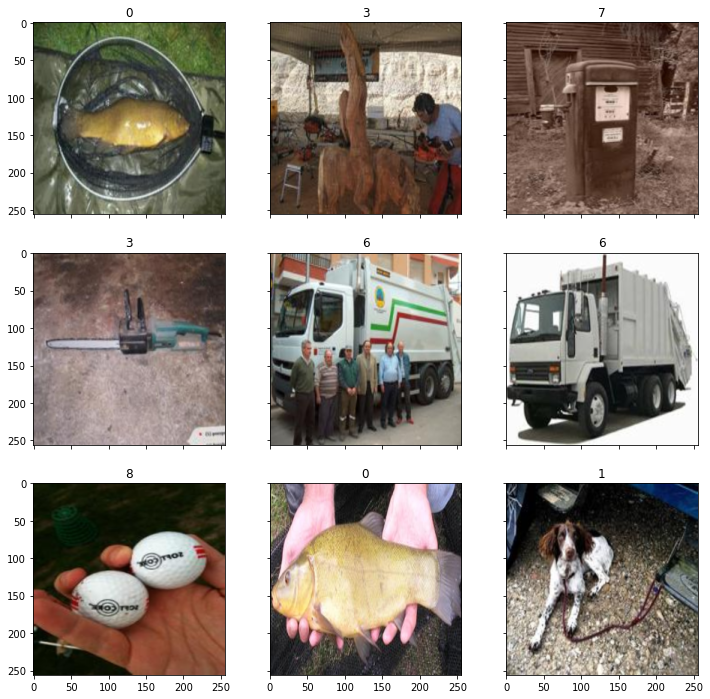

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_img = int(np.random.uniform(0,len(train_files)))
    im_val, label = train_dataset[random_img]
    img_label = label
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=CFG.batch_size, shuffle=True, num_workers=CFG.num_workers)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=CFG.batch_size, shuffle=False, num_workers=CFG.num_workers)

print('Train and Valid datasets are loaded:\n')
print('{:<7s}{:>10s}{:>10s}'.format('Dataset', 'Batches', 'Pictures')), print('-' * 28)
print('{:<7s}{:>10d}{:>10d}'.format('Train', len(train_loader), len(train_dataset)))
print('{:<7s}{:>10d}{:>10d}'.format('Valid', len(val_loader), len(val_dataset)))

Train and Valid datasets are loaded:

Dataset   Batches  Pictures
----------------------------
Train        1184      9469
Valid         491      3925


In [ ]:
# Функция обучения и инференса модели

def train_val_model(model, loss, optimizer, scheduler, num_epochs):
 
    loss_hist = {'train':[], 'val':[]}
    acc_hist = {'train':[], 'val':[]}
    
    best_acc = 0.

    if CFG.wandb:
        os.environ["WANDB_API_KEY"] = CFG.api
        wandb.init(project=CFG.project, name=CFG.model_name, entity=CFG.entity, reinit=True, config=class2dict(CFG))

    seed_everything(CFG.seed)

    for epoch in range(num_epochs):
        print("Epoch {}/{}:".format(epoch+1, num_epochs), end="\n")
        for phase in ['train', 'val']:
            if phase == 'train': #Если фаза == Тренировки  
                dataloader = train_loader
                scheduler.step() #произошла одна эпоха
                model.train()  
            else: #Если фаза == Валидации 
                dataloader = val_loader #берем val_dataloader
                model.eval()   

            running_loss = 0.0
            running_acc = 0
 
            # Итерируемся по dataloader
            for inputs, labels in tqdm(dataloader):
                inputs = inputs.to(device) # Тензор с изображениями переводим на GPU 
                labels = labels.to(device) # Тензор с лейблами переводим на GPU 
 
                optimizer.zero_grad() # Обнуляем градиент,чтобы он не накапливался 
 
                with torch.set_grad_enabled(phase == 'train'): # Если фаза train, то активируем все градиенты (те, которые не заморожены)
                    preds = model(inputs) # Считаем предикты, input передаем в модель
                    loss_value = loss(preds, labels) # Посчитали  Loss    
                    preds_class = preds.argmax(dim=1) # Получаем класс, берем .argmax(dim=1) нейрон с максимальной активацией
                
                    # backward pass + оптимизируем только если это стадия обучения
                    if phase == 'train':
                        loss_value.backward()
                        optimizer.step()
 
                # Статистика
                running_loss += loss_value.item() # Считаем Loss
                running_acc += (preds_class == labels.data).float().mean().data.cpu().numpy()  # Считаем accuracy
 
            epoch_loss = running_loss / len(dataloader)  # Loss'ы делим на кол-во бачей в эпохе 
            epoch_acc = running_acc / len(dataloader) # Считаем Loss на кол-во бачей в эпохе
            
            if CFG.wandb and phase == 'train':
              wandb.log({'train_loss': epoch_loss,
                   'train_accuracy': epoch_acc})

            if CFG.wandb and phase == 'val':
              wandb.log({'test_loss': epoch_loss,
                   'test_accuracy': epoch_acc})
               
            print("{} loss: {:.2f} accuracy: {:.2f}".format(phase, epoch_loss, epoch_acc), end="\n")

            if phase == 'val' and epoch_acc > best_acc:
              best_acc = epoch_acc
              print(f'Epoch {epoch+1} - Save Best Accuracy: {best_acc:.2f} Model\n')
              torch.save(model.state_dict(), '/content/'+f'{CFG.model_name}_best.pth')
            
            loss_hist[phase].append(epoch_loss)
            acc_hist[phase].append(epoch_acc)
        
    return model, loss_hist, acc_hist

## Подзадача №2. 
Изучить внимательно, какие модели есть в библиотеке `timm` и выбрать несколько.

In [ ]:
# ====================================================
# My_Net - класс для создания модели
# ====================================================

# в первый раз считаем без заданного слоя effnet

class My_Net(torch.nn.Module):
    def __init__(self, model_name='resnet152', pretrained=False, effnet=False, value=False):
        super().__init__()
        model = models.resnet152(pretrained=True)
        
        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
          param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
        
        # Добавляем полносвязанную классифицирующую голову
        if effnet: # Для EfficientNet есть небольшие отличия в названии слоев
          fc_inputs = self.model.classifier.in_features
          self.model.classifier = nn.Identity()

        else:
          fc_inputs = self.model.fc.in_features
          self.model.fc = torch.nn.Linear(model.fc.in_features) 

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
# за модель взята resnet с 152 скрытыми слоями 
model = models.resnet152(pretrained=True) 
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

Итак, поехали!

In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs) 

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/30:


100%|██████████| 1184/1184 [06:07<00:00,  3.22it/s]


train loss: 1.89 accuracy: 0.35


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 2.17 accuracy: 0.35
Epoch 1 - Save Best Accuracy: 0.35 Model

Epoch 2/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 1.43 accuracy: 0.52


100%|██████████| 491/491 [00:42<00:00, 11.45it/s]


val loss: 1.49 accuracy: 0.52
Epoch 2 - Save Best Accuracy: 0.52 Model

Epoch 3/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 1.15 accuracy: 0.62


100%|██████████| 491/491 [00:42<00:00, 11.47it/s]


val loss: 1.11 accuracy: 0.65
Epoch 3 - Save Best Accuracy: 0.65 Model

Epoch 4/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.96 accuracy: 0.69


100%|██████████| 491/491 [00:42<00:00, 11.56it/s]


val loss: 1.01 accuracy: 0.69
Epoch 4 - Save Best Accuracy: 0.69 Model

Epoch 5/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.84 accuracy: 0.73


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]


val loss: 1.21 accuracy: 0.63
Epoch 6/30:


100%|██████████| 1184/1184 [05:54<00:00,  3.34it/s]


train loss: 0.73 accuracy: 0.76


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.81 accuracy: 0.74
Epoch 6 - Save Best Accuracy: 0.74 Model

Epoch 7/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.66 accuracy: 0.78


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.77 accuracy: 0.76
Epoch 7 - Save Best Accuracy: 0.76 Model

Epoch 8/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.60 accuracy: 0.81


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.66 accuracy: 0.79
Epoch 8 - Save Best Accuracy: 0.79 Model

Epoch 9/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.55 accuracy: 0.82


100%|██████████| 491/491 [00:42<00:00, 11.61it/s]


val loss: 0.78 accuracy: 0.76
Epoch 10/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.51 accuracy: 0.84


100%|██████████| 491/491 [00:41<00:00, 11.74it/s]


val loss: 0.76 accuracy: 0.77
Epoch 11/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.46 accuracy: 0.85


100%|██████████| 491/491 [00:42<00:00, 11.46it/s]


val loss: 0.66 accuracy: 0.80
Epoch 11 - Save Best Accuracy: 0.80 Model

Epoch 12/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.43 accuracy: 0.86


100%|██████████| 491/491 [00:42<00:00, 11.67it/s]


val loss: 0.62 accuracy: 0.81
Epoch 12 - Save Best Accuracy: 0.81 Model

Epoch 13/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.39 accuracy: 0.87


100%|██████████| 491/491 [00:42<00:00, 11.61it/s]


val loss: 0.60 accuracy: 0.82
Epoch 13 - Save Best Accuracy: 0.82 Model

Epoch 14/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.36 accuracy: 0.88


100%|██████████| 491/491 [00:42<00:00, 11.60it/s]


val loss: 0.71 accuracy: 0.79
Epoch 15/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.32 accuracy: 0.89


100%|██████████| 491/491 [00:42<00:00, 11.60it/s]


val loss: 0.71 accuracy: 0.79
Epoch 16/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.32 accuracy: 0.89


100%|██████████| 491/491 [00:42<00:00, 11.64it/s]


val loss: 0.76 accuracy: 0.79
Epoch 17/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.29 accuracy: 0.90


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.81 accuracy: 0.77
Epoch 18/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.27 accuracy: 0.91


100%|██████████| 491/491 [00:42<00:00, 11.50it/s]


val loss: 0.55 accuracy: 0.83
Epoch 18 - Save Best Accuracy: 0.83 Model

Epoch 19/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.25 accuracy: 0.92


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]


val loss: 0.63 accuracy: 0.82
Epoch 20/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.13 accuracy: 0.96


100%|██████████| 491/491 [00:42<00:00, 11.63it/s]


val loss: 0.50 accuracy: 0.85
Epoch 20 - Save Best Accuracy: 0.85 Model

Epoch 21/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.09 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.50it/s]


val loss: 0.49 accuracy: 0.86
Epoch 21 - Save Best Accuracy: 0.86 Model

Epoch 22/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.63it/s]


val loss: 0.45 accuracy: 0.87
Epoch 22 - Save Best Accuracy: 0.87 Model

Epoch 23/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.57it/s]


val loss: 0.47 accuracy: 0.87
Epoch 24/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.39it/s]


val loss: 0.47 accuracy: 0.87
Epoch 24 - Save Best Accuracy: 0.87 Model

Epoch 25/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.48 accuracy: 0.87
Epoch 26/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.06 accuracy: 0.99


100%|██████████| 491/491 [00:43<00:00, 11.37it/s]


val loss: 0.48 accuracy: 0.87
Epoch 27/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.05 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.57it/s]


val loss: 0.50 accuracy: 0.86
Epoch 28/30:


100%|██████████| 1184/1184 [05:54<00:00,  3.34it/s]


train loss: 0.05 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.43it/s]


val loss: 0.52 accuracy: 0.86
Epoch 29/30:


100%|██████████| 1184/1184 [05:54<00:00,  3.34it/s]


train loss: 0.04 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.49 accuracy: 0.87
Epoch 30/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.04 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]

val loss: 0.50 accuracy: 0.87


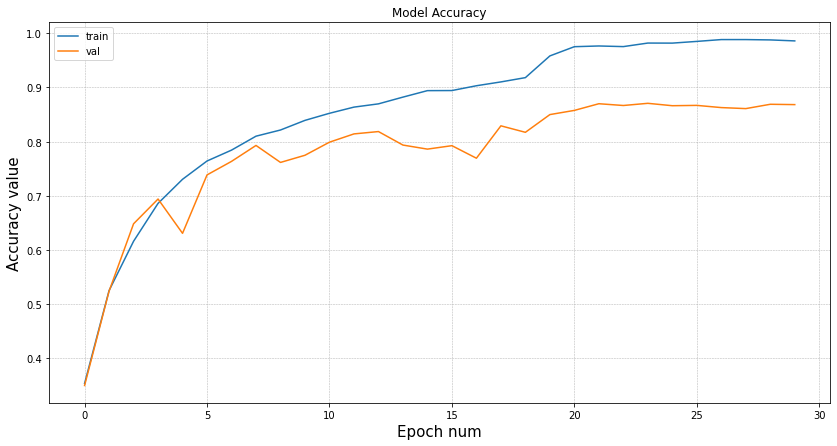

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

Видно явное переобучение модели и недостаточную точность на тесте. 

Добавила effnet

In [ ]:
# ====================================================
# Теперь попробую сделать с использованием effnet, код к нему взят из https://huggingface.co/spaces/hlopez/Waste-Detector/blame/528f436a027c5eb983b446dd43a02be6df5f3d47/classifier.py
# ====================================================

class My_Net(torch.nn.Module):
    def __init__(self, model_name='resnet152', pretrained=False, effnet=False, value=False):
        super().__init__()
        model = models.resnet152(pretrained=True)
        
        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
          param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
        
        # Добавляем полносвязанную классифицирующую голову
        if effnet: # Для EfficientNet есть небольшие отличия в названии слоев
          fc_inputs = self.model.classifier.in_features
          self.model.classifier = nn.Identity()
          self.model.classifier = nn.Sequential(
            #nn.Dropout(0.5),
            nn.Linear(in_features, 256),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(256, target_size)
        )

        else:
          fc_inputs = self.model.fc.in_features
          self.model.fc = torch.nn.Linear(model.fc.in_features) 

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model = models.resnet152(pretrained=True) 
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs) 

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/30:


100%|██████████| 1184/1184 [05:58<00:00,  3.31it/s]


train loss: 1.58 accuracy: 0.48


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 1.55 accuracy: 0.51
Epoch 1 - Save Best Accuracy: 0.51 Model

Epoch 2/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 1.04 accuracy: 0.66


100%|██████████| 491/491 [00:42<00:00, 11.53it/s]


val loss: 0.94 accuracy: 0.71
Epoch 2 - Save Best Accuracy: 0.71 Model

Epoch 3/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.85 accuracy: 0.73


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]


val loss: 1.03 accuracy: 0.68
Epoch 4/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.74 accuracy: 0.77


100%|██████████| 491/491 [00:41<00:00, 11.69it/s]


val loss: 0.69 accuracy: 0.79
Epoch 4 - Save Best Accuracy: 0.79 Model

Epoch 5/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.64 accuracy: 0.79


100%|██████████| 491/491 [00:42<00:00, 11.61it/s]


val loss: 0.79 accuracy: 0.76
Epoch 6/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.57 accuracy: 0.81


100%|██████████| 491/491 [00:42<00:00, 11.55it/s]


val loss: 1.01 accuracy: 0.73
Epoch 7/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.51 accuracy: 0.84


100%|██████████| 491/491 [00:42<00:00, 11.56it/s]


val loss: 0.70 accuracy: 0.79
Epoch 8/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.36it/s]


train loss: 0.46 accuracy: 0.85


100%|██████████| 491/491 [00:42<00:00, 11.55it/s]


val loss: 0.57 accuracy: 0.82
Epoch 8 - Save Best Accuracy: 0.82 Model

Epoch 9/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.41 accuracy: 0.86


100%|██████████| 491/491 [00:42<00:00, 11.50it/s]


val loss: 0.90 accuracy: 0.74
Epoch 10/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.37 accuracy: 0.88


100%|██████████| 491/491 [00:42<00:00, 11.61it/s]


val loss: 0.67 accuracy: 0.80
Epoch 11/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.36it/s]


train loss: 0.34 accuracy: 0.89


100%|██████████| 491/491 [00:42<00:00, 11.50it/s]


val loss: 0.61 accuracy: 0.83
Epoch 11 - Save Best Accuracy: 0.83 Model

Epoch 12/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.37it/s]


train loss: 0.31 accuracy: 0.90


100%|██████████| 491/491 [00:42<00:00, 11.57it/s]


val loss: 0.55 accuracy: 0.83
Epoch 12 - Save Best Accuracy: 0.83 Model

Epoch 13/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.28 accuracy: 0.91


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.73 accuracy: 0.81
Epoch 14/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.36it/s]


train loss: 0.26 accuracy: 0.91


100%|██████████| 491/491 [00:42<00:00, 11.62it/s]


val loss: 0.53 accuracy: 0.85
Epoch 14 - Save Best Accuracy: 0.85 Model

Epoch 15/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.22 accuracy: 0.93


100%|██████████| 491/491 [00:42<00:00, 11.44it/s]


val loss: 0.60 accuracy: 0.83
Epoch 16/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.23 accuracy: 0.92


100%|██████████| 491/491 [00:42<00:00, 11.56it/s]


val loss: 0.54 accuracy: 0.85
Epoch 17/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.36it/s]


train loss: 0.19 accuracy: 0.94


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.54 accuracy: 0.85
Epoch 18/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.18 accuracy: 0.94


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.51 accuracy: 0.85
Epoch 18 - Save Best Accuracy: 0.85 Model

Epoch 19/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.17 accuracy: 0.94


100%|██████████| 491/491 [00:42<00:00, 11.55it/s]


val loss: 0.49 accuracy: 0.86
Epoch 19 - Save Best Accuracy: 0.86 Model

Epoch 20/30:


100%|██████████| 1184/1184 [05:51<00:00,  3.36it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.41 accuracy: 0.88
Epoch 20 - Save Best Accuracy: 0.88 Model

Epoch 21/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.57it/s]


val loss: 0.42 accuracy: 0.88
Epoch 21 - Save Best Accuracy: 0.88 Model

Epoch 22/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.35it/s]


train loss: 0.05 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]


val loss: 0.36 accuracy: 0.89
Epoch 22 - Save Best Accuracy: 0.89 Model

Epoch 23/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.04 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.50it/s]


val loss: 0.38 accuracy: 0.89
Epoch 24/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.04 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.53it/s]


val loss: 0.39 accuracy: 0.89
Epoch 25/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.03 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.47it/s]


val loss: 0.38 accuracy: 0.90
Epoch 25 - Save Best Accuracy: 0.90 Model

Epoch 26/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.03 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.56it/s]


val loss: 0.41 accuracy: 0.89
Epoch 27/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.36it/s]


train loss: 0.02 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.60it/s]


val loss: 0.40 accuracy: 0.89
Epoch 28/30:


100%|██████████| 1184/1184 [05:52<00:00,  3.35it/s]


train loss: 0.03 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.64it/s]


val loss: 0.38 accuracy: 0.90
Epoch 29/30:


100%|██████████| 1184/1184 [05:53<00:00,  3.35it/s]


train loss: 0.02 accuracy: 1.00


100%|██████████| 491/491 [00:42<00:00, 11.43it/s]


val loss: 0.39 accuracy: 0.89
Epoch 30/30:


100%|██████████| 1184/1184 [05:55<00:00,  3.33it/s]


train loss: 0.02 accuracy: 0.99


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]

val loss: 0.40 accuracy: 0.89


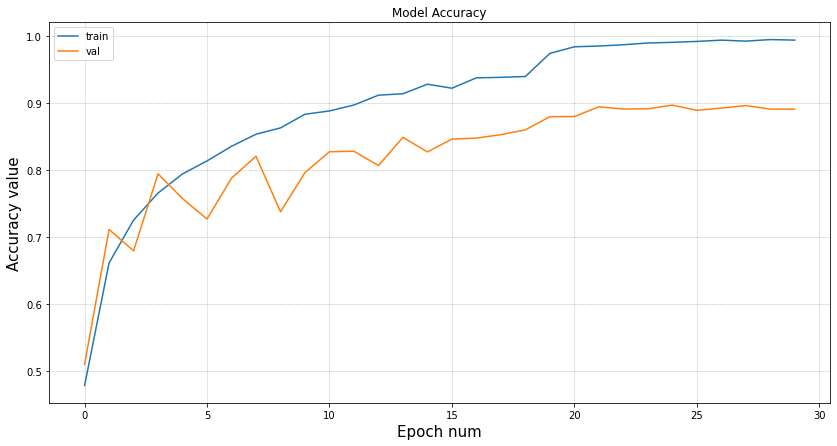

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

Все еще видно переобучение модели, но на тесте показатели стали лучше (достигает 0,9).

Теперь попробую использовать модель alexnet

In [ ]:
class My_Net(torch.nn.Module):
    def __init__(self, model_name='resnet152', pretrained=False, effnet=False, value=False):
        super().__init__()
        model = models.alexnet(pretrained=True)
        
        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
          param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
        
        # Добавляем полносвязанную классифицирующую голову
        if effnet: # Для EfficientNet есть небольшие отличия в названии слоев
          fc_inputs = self.model.classifier.in_features
          self.model.classifier = nn.Identity()
          self.model.classifier = nn.Sequential(
            #nn.Dropout(0.5),
            nn.Linear(in_features, 256),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(256, target_size)
        )

        else:
          fc_inputs = self.model.fc.in_features
          self.model.fc = torch.nn.Linear(model.fc.in_features) 

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs) 

Epoch 1/30:


100%|██████████| 1184/1184 [41:28<00:00,  2.10s/it]


train loss: 2.31 accuracy: 0.10


100%|██████████| 491/491 [03:07<00:00,  2.61it/s]


val loss: 2.31 accuracy: 0.10
Epoch 1 - Save Best Accuracy: 0.10 Model

Epoch 2/30:


100%|██████████| 1184/1184 [39:59<00:00,  2.03s/it]


train loss: 3.60 accuracy: 0.10


100%|██████████| 491/491 [03:05<00:00,  2.64it/s]


val loss: 2.31 accuracy: 0.09
Epoch 3/30:


100%|██████████| 1184/1184 [41:01<00:00,  2.08s/it]


train loss: 2.31 accuracy: 0.09


100%|██████████| 491/491 [03:07<00:00,  2.62it/s]


val loss: 2.30 accuracy: 0.09
Epoch 4/30:


100%|██████████| 1184/1184 [41:07<00:00,  2.08s/it]


train loss: 2.30 accuracy: 0.10


100%|██████████| 491/491 [03:06<00:00,  2.63it/s]


val loss: 2.31 accuracy: 0.10
Epoch 4 - Save Best Accuracy: 0.10 Model

Epoch 5/30:


100%|██████████| 1184/1184 [41:05<00:00,  2.08s/it]


train loss: 2.30 accuracy: 0.10


100%|██████████| 491/491 [03:07<00:00,  2.62it/s]


val loss: 2.30 accuracy: 0.09
Epoch 6/30:


100%|██████████| 1184/1184 [40:49<00:00,  2.07s/it]


train loss: 2.32 accuracy: 0.10


100%|██████████| 491/491 [03:01<00:00,  2.71it/s]


val loss: 2.30 accuracy: 0.09
Epoch 7/30:


 89%|████████▊ | 1048/1184 [35:51<04:31,  2.00s/it]

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

#Исправленный вариант My_Net

In [ ]:
timm.list_models()

['adv_inception_v3',
 'bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_224_in22k',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_224_in22k',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_base_patch16_224_in22k',
 'beitv2_large_patch16_224',
 'beitv2_large_patch16_224_in22k',
 'botnet26t_256',
 'botnet50ts_256',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw

In [ ]:
# ====================================================
# My_Net - класс для создания модели
# ====================================================


class My_Net(torch.nn.Module):
    def __init__(self, model_name, pretrained=True, effnet=False, value=False):  
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        
        # Замораживаем веса, чтобы не использовать лишние веса в обучении, а обучать только последний слой
        for param in self.model.parameters(): # Проходим по параметрам модели (каждый параметр - это каждый слой, model.parameters нам отдаст некоторый итератор по слоям)
          param.requires_grad = False # Для каждого параметра и слоя:"requires grad = False", то есть уже не требуется вычисление градиента для данного слоя. И получается, что у нас вся сетка будет заморожена, то есть мы не сможем вообще ничего обучать            
        
        # Добавляем полносвязанную классифицирующую голову
        if effnet: # Для EfficientNet есть небольшие отличия в названии слоев
          fc_inputs = self.model.classifier.in_features
          self.model.classifier = nn.Linear(fc_inputs, 10)

        else:
          fc_inputs = self.model.fc.in_features
          self.model.fc = nn.Linear(fc_inputs, 10)

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
model = My_Net(model_name = 'resnet152', pretrained=True, effnet=False, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs)

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/30:


100%|██████████| 1184/1184 [01:55<00:00, 10.25it/s]


train loss: 0.41 accuracy: 0.93


100%|██████████| 491/491 [00:42<00:00, 11.44it/s]


val loss: 0.09 accuracy: 0.98
Epoch 1 - Save Best Accuracy: 0.98 Model

Epoch 2/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.96it/s]


train loss: 0.16 accuracy: 0.96


100%|██████████| 491/491 [00:42<00:00, 11.47it/s]


val loss: 0.06 accuracy: 0.99
Epoch 2 - Save Best Accuracy: 0.99 Model

Epoch 3/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.97it/s]


train loss: 0.14 accuracy: 0.96


100%|██████████| 491/491 [00:42<00:00, 11.47it/s]


val loss: 0.06 accuracy: 0.99
Epoch 4/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.01it/s]


train loss: 0.13 accuracy: 0.96


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.07 accuracy: 0.98
Epoch 5/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.98it/s]


train loss: 0.12 accuracy: 0.96


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.05 accuracy: 0.99
Epoch 5 - Save Best Accuracy: 0.99 Model

Epoch 6/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.96it/s]


train loss: 0.11 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.46it/s]


val loss: 0.06 accuracy: 0.99
Epoch 7/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.98it/s]


train loss: 0.11 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.05 accuracy: 0.99
Epoch 8/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.99it/s]


train loss: 0.10 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.49it/s]


val loss: 0.04 accuracy: 0.99
Epoch 9/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.03it/s]


train loss: 0.10 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.04 accuracy: 0.99
Epoch 10/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.01it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.55it/s]


val loss: 0.05 accuracy: 0.98
Epoch 11/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.98it/s]


train loss: 0.10 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.52it/s]


val loss: 0.05 accuracy: 0.99
Epoch 12/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.01it/s]


train loss: 0.10 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.04 accuracy: 0.99
Epoch 13/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.03it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.53it/s]


val loss: 0.05 accuracy: 0.99
Epoch 14/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.03it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.54it/s]


val loss: 0.05 accuracy: 0.99
Epoch 15/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.01it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.58it/s]


val loss: 0.04 accuracy: 0.99
Epoch 16/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.99it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]


val loss: 0.05 accuracy: 0.99
Epoch 17/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.02it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.44it/s]


val loss: 0.04 accuracy: 0.99
Epoch 18/30:


100%|██████████| 1184/1184 [01:47<00:00, 11.00it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.04 accuracy: 0.99
Epoch 19/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.92it/s]


train loss: 0.08 accuracy: 0.97


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.05 accuracy: 0.99
Epoch 20/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.94it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.44it/s]


val loss: 0.05 accuracy: 0.99
Epoch 21/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.91it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.46it/s]


val loss: 0.04 accuracy: 0.99
Epoch 22/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.94it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.37it/s]


val loss: 0.05 accuracy: 0.99
Epoch 23/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.91it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.39it/s]


val loss: 0.05 accuracy: 0.99
Epoch 24/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.95it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.48it/s]


val loss: 0.04 accuracy: 0.99
Epoch 25/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.96it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.40it/s]


val loss: 0.04 accuracy: 0.99
Epoch 26/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.91it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.38it/s]


val loss: 0.04 accuracy: 0.99
Epoch 27/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.92it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:43<00:00, 11.32it/s]


val loss: 0.04 accuracy: 0.99
Epoch 27 - Save Best Accuracy: 0.99 Model

Epoch 28/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.93it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.46it/s]


val loss: 0.04 accuracy: 0.99
Epoch 28 - Save Best Accuracy: 0.99 Model

Epoch 29/30:


100%|██████████| 1184/1184 [01:47<00:00, 10.98it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.47it/s]


val loss: 0.04 accuracy: 0.99
Epoch 30/30:


100%|██████████| 1184/1184 [01:48<00:00, 10.95it/s]


train loss: 0.08 accuracy: 0.98


100%|██████████| 491/491 [00:42<00:00, 11.51it/s]

val loss: 0.04 accuracy: 0.99


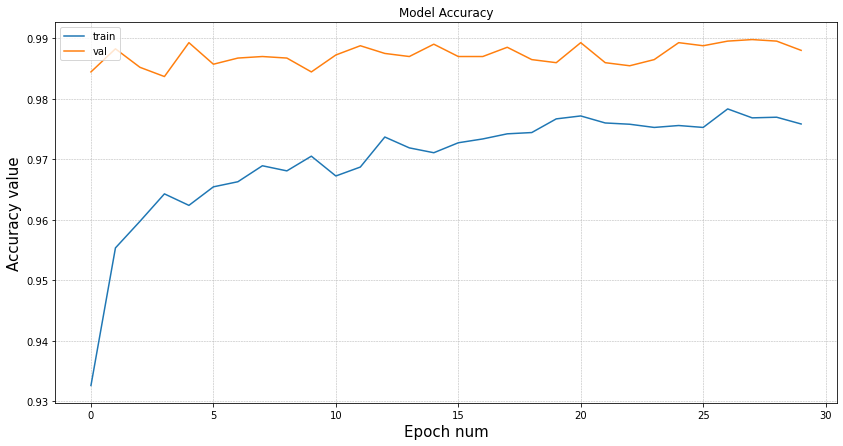

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

In [ ]:
model = My_Net(model_name = 'resnet26', pretrained=True, effnet=False, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26-9aa10e23.pth" to /root/.cache/torch/hub/checkpoints/resnet26-9aa10e23.pth


In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs)

Epoch 1/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.34it/s]


train loss: 0.36 accuracy: 0.89


100%|██████████| 491/491 [00:13<00:00, 36.35it/s]


val loss: 0.16 accuracy: 0.95
Epoch 1 - Save Best Accuracy: 0.95 Model

Epoch 2/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.41it/s]


train loss: 0.23 accuracy: 0.92


100%|██████████| 491/491 [00:13<00:00, 36.06it/s]


val loss: 0.14 accuracy: 0.96
Epoch 2 - Save Best Accuracy: 0.96 Model

Epoch 3/30:


100%|██████████| 1184/1184 [00:34<00:00, 33.94it/s]


train loss: 0.19 accuracy: 0.94


100%|██████████| 491/491 [00:13<00:00, 36.42it/s]


val loss: 0.10 accuracy: 0.97
Epoch 3 - Save Best Accuracy: 0.97 Model

Epoch 4/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.74it/s]


train loss: 0.17 accuracy: 0.95


100%|██████████| 491/491 [00:13<00:00, 36.74it/s]


val loss: 0.12 accuracy: 0.96
Epoch 5/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.19it/s]


train loss: 0.16 accuracy: 0.95


100%|██████████| 491/491 [00:13<00:00, 36.17it/s]


val loss: 0.12 accuracy: 0.96
Epoch 6/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.13it/s]


train loss: 0.15 accuracy: 0.95


100%|██████████| 491/491 [00:13<00:00, 36.39it/s]


val loss: 0.10 accuracy: 0.97
Epoch 6 - Save Best Accuracy: 0.97 Model

Epoch 7/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.30it/s]


train loss: 0.13 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.54it/s]


val loss: 0.12 accuracy: 0.96
Epoch 8/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.43it/s]


train loss: 0.13 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 35.57it/s]


val loss: 0.12 accuracy: 0.97
Epoch 9/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.76it/s]


train loss: 0.12 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.56it/s]


val loss: 0.11 accuracy: 0.97
Epoch 10/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.40it/s]


train loss: 0.12 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.42it/s]


val loss: 0.12 accuracy: 0.96
Epoch 11/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.38it/s]


train loss: 0.12 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.41it/s]


val loss: 0.13 accuracy: 0.96
Epoch 12/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.63it/s]


train loss: 0.12 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.94it/s]


val loss: 0.11 accuracy: 0.97
Epoch 13/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.58it/s]


train loss: 0.11 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.55it/s]


val loss: 0.11 accuracy: 0.97
Epoch 14/30:


100%|██████████| 1184/1184 [00:33<00:00, 34.85it/s]


train loss: 0.10 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.44it/s]


val loss: 0.11 accuracy: 0.96
Epoch 15/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.67it/s]


train loss: 0.10 accuracy: 0.96


100%|██████████| 491/491 [00:13<00:00, 36.49it/s]


val loss: 0.11 accuracy: 0.97
Epoch 16/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.00it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:13<00:00, 37.50it/s]


val loss: 0.11 accuracy: 0.97
Epoch 16 - Save Best Accuracy: 0.97 Model

Epoch 17/30:


100%|██████████| 1184/1184 [00:33<00:00, 34.86it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:13<00:00, 36.67it/s]


val loss: 0.13 accuracy: 0.96
Epoch 18/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.52it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:13<00:00, 36.61it/s]


val loss: 0.14 accuracy: 0.96
Epoch 19/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.63it/s]


train loss: 0.09 accuracy: 0.97


100%|██████████| 491/491 [00:13<00:00, 36.69it/s]


val loss: 0.15 accuracy: 0.96
Epoch 20/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.46it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.18it/s]


val loss: 0.10 accuracy: 0.97
Epoch 20 - Save Best Accuracy: 0.97 Model

Epoch 21/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.49it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.59it/s]


val loss: 0.11 accuracy: 0.97
Epoch 22/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.46it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.53it/s]


val loss: 0.11 accuracy: 0.97
Epoch 23/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.49it/s]


train loss: 0.07 accuracy: 0.97


100%|██████████| 491/491 [00:13<00:00, 36.39it/s]


val loss: 0.11 accuracy: 0.97
Epoch 24/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.55it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 37.02it/s]


val loss: 0.10 accuracy: 0.97
Epoch 25/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.50it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.46it/s]


val loss: 0.11 accuracy: 0.97
Epoch 26/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.24it/s]


train loss: 0.07 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.11it/s]


val loss: 0.11 accuracy: 0.97
Epoch 27/30:


100%|██████████| 1184/1184 [00:35<00:00, 32.89it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.24it/s]


val loss: 0.11 accuracy: 0.97
Epoch 28/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.30it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.08it/s]


val loss: 0.11 accuracy: 0.97
Epoch 29/30:


100%|██████████| 1184/1184 [00:34<00:00, 34.30it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.25it/s]


val loss: 0.10 accuracy: 0.97
Epoch 30/30:


100%|██████████| 1184/1184 [00:35<00:00, 33.35it/s]


train loss: 0.06 accuracy: 0.98


100%|██████████| 491/491 [00:13<00:00, 36.45it/s]

val loss: 0.11 accuracy: 0.97


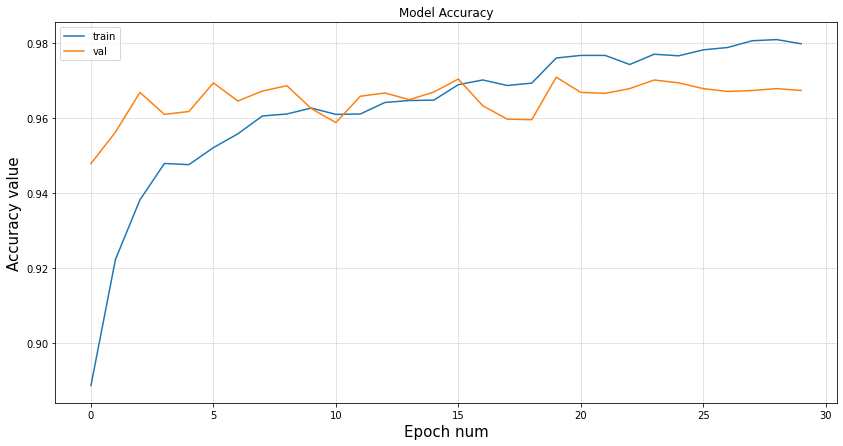

In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

In [ ]:
model = My_Net(model_name = 'seresnet101', pretrained=True, effnet=False, value=False) # Формат pretrained=True - нам нужны веса, которые получились вследствие обучения этой модели на датасете ImageNet
          
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
 
# Определяем Loss функцию
# В данном случае - это кросс-энтропия
loss = torch.nn.CrossEntropyLoss()
# Метод градиентного спуска Adam
optimizer = torch.optim.Adam(model.parameters(), amsgrad=True, lr=0.001) #lr - шаг градиентного спуска


# Определяем разные типы изменения скорости обучения
def get_scheduler(optimizer):
        if CFG.scheduler=='ReduceLROnPlateau':
          scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='StepLR':
          scheduler = StepLR(optimizer, step_size=CFG.step_size, gamma=CFG.gamma)
        elif CFG.scheduler=='CosineAnnealingLR':
          scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
          scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        return scheduler

scheduler = get_scheduler(optimizer)

In [ ]:
model, loss, acc = train_val_model(model, loss, optimizer, scheduler, num_epochs=CFG.epochs)

/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch 1/30:


100%|██████████| 1184/1184 [01:29<00:00, 13.29it/s]


train loss: 2.02 accuracy: 0.30


100%|██████████| 491/491 [00:32<00:00, 15.18it/s]


val loss: 2.12 accuracy: 0.28
Epoch 1 - Save Best Accuracy: 0.28 Model

Epoch 2/30:


100%|██████████| 1184/1184 [01:22<00:00, 14.39it/s]


train loss: 1.88 accuracy: 0.36


100%|██████████| 491/491 [00:33<00:00, 14.80it/s]


val loss: 2.26 accuracy: 0.29
Epoch 2 - Save Best Accuracy: 0.29 Model

Epoch 3/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.20it/s]


train loss: 1.81 accuracy: 0.38


100%|██████████| 491/491 [00:32<00:00, 14.90it/s]


val loss: 2.31 accuracy: 0.29
Epoch 3 - Save Best Accuracy: 0.29 Model

Epoch 4/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.20it/s]


train loss: 1.77 accuracy: 0.40


100%|██████████| 491/491 [00:33<00:00, 14.66it/s]


val loss: 2.72 accuracy: 0.25
Epoch 5/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.18it/s]


train loss: 1.74 accuracy: 0.41


100%|██████████| 491/491 [00:32<00:00, 14.89it/s]


val loss: 2.29 accuracy: 0.30
Epoch 5 - Save Best Accuracy: 0.30 Model

Epoch 6/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.17it/s]


train loss: 1.71 accuracy: 0.42


100%|██████████| 491/491 [00:33<00:00, 14.76it/s]


val loss: 2.67 accuracy: 0.27
Epoch 7/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.23it/s]


train loss: 1.69 accuracy: 0.43


100%|██████████| 491/491 [00:33<00:00, 14.84it/s]


val loss: 2.47 accuracy: 0.29
Epoch 8/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.18it/s]


train loss: 1.69 accuracy: 0.43


100%|██████████| 491/491 [00:33<00:00, 14.71it/s]


val loss: 2.27 accuracy: 0.34
Epoch 8 - Save Best Accuracy: 0.34 Model

Epoch 9/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.22it/s]


train loss: 1.66 accuracy: 0.45


100%|██████████| 491/491 [00:33<00:00, 14.78it/s]


val loss: 2.38 accuracy: 0.31
Epoch 10/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.21it/s]


train loss: 1.65 accuracy: 0.44


100%|██████████| 491/491 [00:33<00:00, 14.85it/s]


val loss: 2.67 accuracy: 0.30
Epoch 11/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.23it/s]


train loss: 1.66 accuracy: 0.45


100%|██████████| 491/491 [00:33<00:00, 14.69it/s]


val loss: 2.78 accuracy: 0.30
Epoch 12/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.25it/s]


train loss: 1.61 accuracy: 0.46


100%|██████████| 491/491 [00:32<00:00, 14.98it/s]


val loss: 3.23 accuracy: 0.24
Epoch 13/30:


100%|██████████| 1184/1184 [01:22<00:00, 14.28it/s]


train loss: 1.61 accuracy: 0.45


100%|██████████| 491/491 [00:33<00:00, 14.73it/s]


val loss: 2.41 accuracy: 0.31
Epoch 14/30:


100%|██████████| 1184/1184 [01:22<00:00, 14.29it/s]


train loss: 1.62 accuracy: 0.46


100%|██████████| 491/491 [00:32<00:00, 14.90it/s]


val loss: 2.72 accuracy: 0.29
Epoch 15/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.24it/s]


train loss: 1.60 accuracy: 0.46


100%|██████████| 491/491 [00:33<00:00, 14.75it/s]


val loss: 2.81 accuracy: 0.30
Epoch 16/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.23it/s]


train loss: 1.61 accuracy: 0.46


100%|██████████| 491/491 [00:32<00:00, 14.94it/s]


val loss: 2.69 accuracy: 0.32
Epoch 17/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.20it/s]


train loss: 1.58 accuracy: 0.47


100%|██████████| 491/491 [00:33<00:00, 14.67it/s]


val loss: 3.09 accuracy: 0.29
Epoch 18/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.19it/s]


train loss: 1.57 accuracy: 0.48


100%|██████████| 491/491 [00:33<00:00, 14.81it/s]


val loss: 2.43 accuracy: 0.33
Epoch 19/30:


100%|██████████| 1184/1184 [01:31<00:00, 12.97it/s]


train loss: 1.57 accuracy: 0.47


100%|██████████| 491/491 [00:36<00:00, 13.48it/s]


val loss: 2.28 accuracy: 0.35
Epoch 19 - Save Best Accuracy: 0.35 Model

Epoch 20/30:


100%|██████████| 1184/1184 [01:25<00:00, 13.88it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.74it/s]


val loss: 2.63 accuracy: 0.30
Epoch 21/30:


100%|██████████| 1184/1184 [01:24<00:00, 14.03it/s]


train loss: 1.41 accuracy: 0.54


100%|██████████| 491/491 [00:33<00:00, 14.75it/s]


val loss: 2.42 accuracy: 0.33
Epoch 22/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.18it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.76it/s]


val loss: 2.23 accuracy: 0.36
Epoch 22 - Save Best Accuracy: 0.36 Model

Epoch 23/30:


100%|██████████| 1184/1184 [01:25<00:00, 13.86it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:32<00:00, 14.88it/s]


val loss: 2.17 accuracy: 0.36
Epoch 24/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.18it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.69it/s]


val loss: 2.21 accuracy: 0.35
Epoch 25/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.18it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:32<00:00, 14.88it/s]


val loss: 2.21 accuracy: 0.35
Epoch 26/30:


100%|██████████| 1184/1184 [01:24<00:00, 14.09it/s]


train loss: 1.40 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.70it/s]


val loss: 2.20 accuracy: 0.36
Epoch 27/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.13it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.75it/s]


val loss: 2.26 accuracy: 0.35
Epoch 28/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.14it/s]


train loss: 1.40 accuracy: 0.54


100%|██████████| 491/491 [00:32<00:00, 14.90it/s]


val loss: 2.32 accuracy: 0.34
Epoch 29/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.16it/s]


train loss: 1.41 accuracy: 0.53


100%|██████████| 491/491 [00:33<00:00, 14.74it/s]


val loss: 2.35 accuracy: 0.34
Epoch 30/30:


100%|██████████| 1184/1184 [01:23<00:00, 14.23it/s]


train loss: 1.40 accuracy: 0.54


100%|██████████| 491/491 [00:32<00:00, 14.90it/s]

val loss: 2.19 accuracy: 0.36


In [ ]:
plt.rcParams['figure.figsize'] = (14, 7)
for experiment_id in acc.keys():
    plt.plot(acc[experiment_id], label=experiment_id)
plt.legend(loc='upper left')
plt.title('Model Accuracy')
plt.xlabel('Epoch num', fontsize=15)
plt.ylabel('Accuracy value', fontsize=15);
plt.grid(linestyle='--', linewidth=0.5, color='.7')

Для проверки были выбраны три модели:


1.   resnet152 - resnet с 152 скрытыми слоями

Epoch 28 - Save Best Accuracy: 0.99 Model


2.   resnet26 - resnet с 26 скрытыми слоями

Epoch 20 - Save Best Accuracy: 0.97 Model

3. seresnet101



В ResNet заложены простые идеи: подаём выходные данные двух успешных свёрточных слоёв И обходим входные данные для следующего слоя



Выводы: 

1) у resnet повысилась точность модели с увеличением числа скрытых слоев.

2) у seresnet101, не имеющей преобученных весов, очень низкие показатели точности 0.36 Model, в то время, как resnet достигает 98% и выше 